<a href="https://colab.research.google.com/github/jhonathanwesley/udacity-statistics-nd/blob/master/sleep_health_and_lifestyle_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Data Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
from google.colab import drive
import pandas as pd
import getpass
import os


drive.mount('/content/drive')
if os.environ.get("SOURCE_DATA_PATH") == None:
    os.environ['SOURCE_DATA_PATH'] = getpass.getpass("Enter the file path: ")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_path = os.environ.get('SOURCE_DATA_PATH')
df = pd.read_csv(data_path)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.shape

(374, 13)

In [9]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


|index|Person ID|Age|Sleep Duration|Quality of Sleep|Physical Activity Level|Stress Level|Heart Rate|Daily Steps|
|---|---|---|---|---|---|---|---|---|
|count|374\.0|374\.0|374\.0|374\.0|374\.0|374\.0|374\.0|374\.0|
|mean|187\.5|42\.18449197860963|7\.132085561497325|7\.31283422459893|59\.17112299465241|5\.385026737967914|70\.16577540106952|6816\.844919786096|
|std|108\.10874155219827|8\.67313346554724|0\.7956567308898188|1\.1969559197336044|20\.830803658071673|1\.7745264441985167|4\.135675535112214|1617\.915679133637|
|min|1\.0|27\.0|5\.8|4\.0|30\.0|3\.0|65\.0|3000\.0|
|25%|94\.25|35\.25|6\.4|6\.0|45\.0|4\.0|68\.0|5600\.0|
|50%|187\.5|43\.0|7\.2|7\.0|60\.0|5\.0|70\.0|7000\.0|
|75%|280\.75|50\.0|7\.8|8\.0|75\.0|7\.0|72\.0|8000\.0|
|max|374\.0|59\.0|8\.5|9\.0|90\.0|8\.0|86\.0|10000\.0|

In [16]:
import matplotlib.pyplot as plt

```python
# Linha da Média (Geralmente traçada/dashed e vermelha)
ax_hist.axvline(media, color='red', linestyle='--', linewidth=1.5, label=f'Média: {media:.2f}')

# Linha da Mediana (Geralmente sólida e de outra cor, ex: verde ou laranja)
ax_hist.axvline(mediana, color='green', linestyle='-', linewidth=1.5, label=f'Mediana: {mediana:.2f}')
```

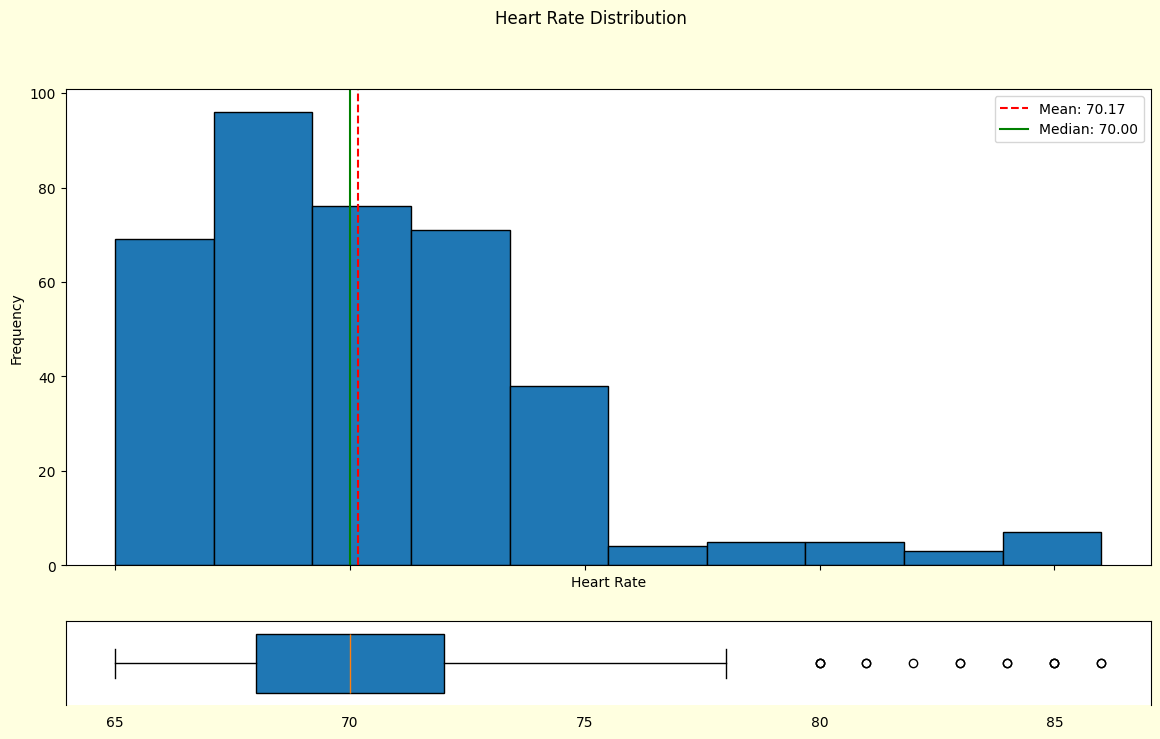

In [57]:
hearth_rate = {
    'mean': df['Heart Rate'].mean(),
    'median': df['Heart Rate'].median()
}

fig, (ax_hist, ax_box) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': (.85, .15)},
    figsize=(14, 8),
)

fig.suptitle('Heart Rate Distribution')
fig.set_facecolor('lightyellow')
ax_hist.hist(df['Heart Rate'], bins=10, edgecolor='black')
ax_hist.set_ylabel('Frequency')
ax_hist.set_xlabel('Heart Rate')
ax_hist.autoscale(enable=True, axis='y')

ax_hist.axvline(hearth_rate['mean'], color='red', linestyle="--", linewidth=1.5, label=f"Mean: {hearth_rate['mean']:.2f}")
ax_hist.axvline(hearth_rate['median'], color='green', linestyle="-", linewidth=1.5, label=f"Median: {hearth_rate['median']:.2f}")
ax_hist.legend()

ax_box.boxplot(
    df['Heart Rate'],
    vert=False,
    widths=.7,
    patch_artist=True,
)

ax_box.set(yticks=[])
ax_box.spines['bottom'].set_visible(False)
ax_box.tick_params(bottom=False)

plt.subplots_adjust(hspace=.2)

plt.show()

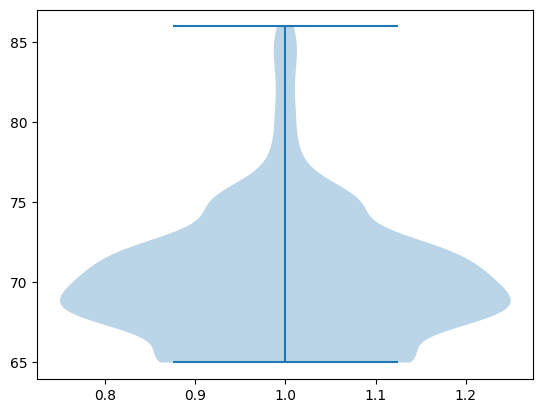

In [ ]:
plt.violinplot(df['Heart Rate'])
plt.show()

In [ ]:
df.describe()[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


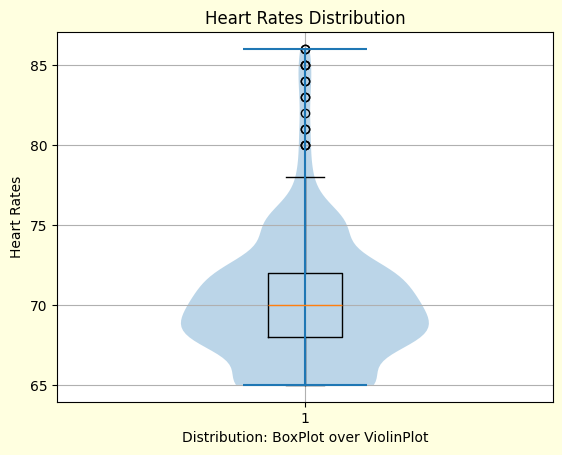

In [ ]:
fig, ax = plt.subplots()
fig.set_facecolor('lightyellow')
ax.boxplot(df['Heart Rate'])
ax.violinplot(df['Heart Rate'])
ax.set_xlabel("Distribution: BoxPlot over ViolinPlot")
ax.set_ylabel("Heart Rates")
ax.set_title("Heart Rates Distribution")
ax.grid(True)
plt.show()